### 1. 질문 중복 분석, 라벨 빈도 분석, 문자 분석, 단어 분석

In [54]:
import zipfile
DATA_IN_PATH = 'C:/Users/ehrme/data_in/'

file_list = ['quora-question-pairs.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [55]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [56]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [58]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

파일 크기 : 
sample_submission.csv         22.35MB
test.csv                      314.02MB
test_clean.csv                20.48MB
train.csv                     63.4MB
train_clean.csv               20.7MB
전체 학습데이터의 개수: 404290
교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


#### 1) 질문 중복 분석

In [5]:
# 넘파이를 이용해 중복을 제거한 총 질문의 수와
# 반복해서 나오는 질문의 수 확인
print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


Text(0, 0.5, 'Number of questions')

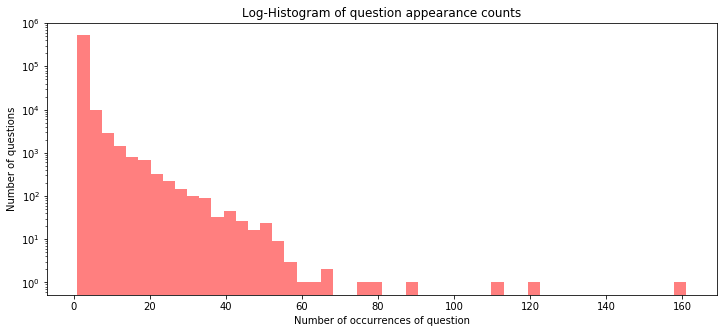

In [6]:
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')

In [7]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
print('제1사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제3사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제1사분위 중복: 1.0
제3사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2684a752a48>,
 'caps': [<matplotlib.lines.Line2D at 0x2684a76e5c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2684a767808>],
 'medians': [<matplotlib.lines.Line2D at 0x2684a75d108>],
 'fliers': [<matplotlib.lines.Line2D at 0x2684a7624c8>],
 'means': [<matplotlib.lines.Line2D at 0x2684a75de08>]}

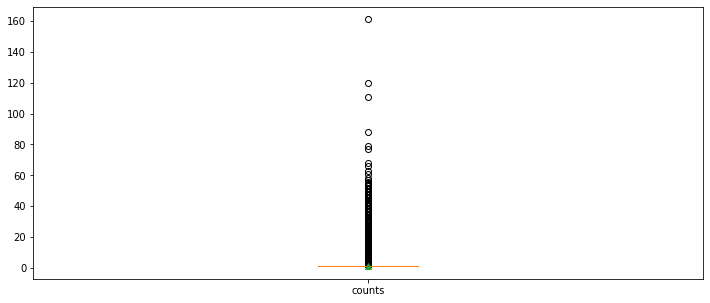

In [8]:
plt.figure(figsize = (12,5))
plt.boxplot([train_set.value_counts()],
           labels = ['counts'],
           showmeans = True)

(-0.5, 799.5, 599.5, -0.5)

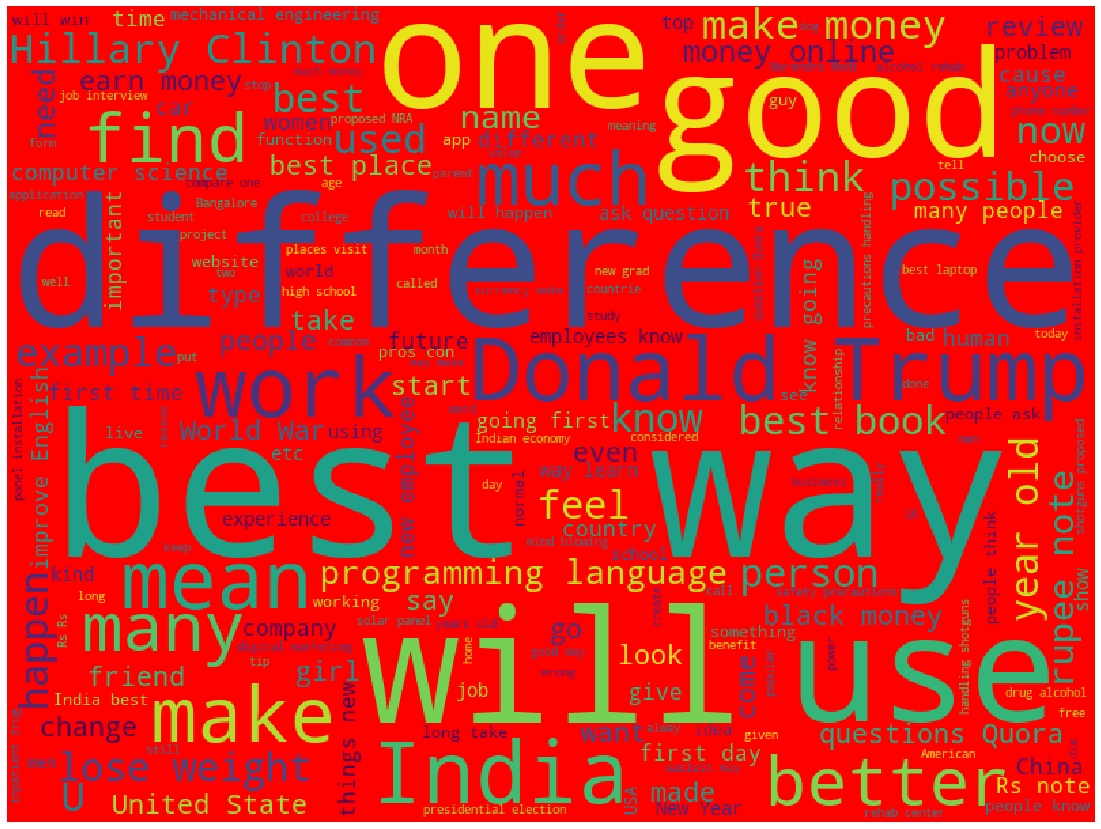

In [9]:
from wordcloud import WordCloud
cloud = WordCloud(width = 800, height = 600, background_color = 'red').generate(' '.join(train_set.astype(str)))
plt.figure(figsize = (20, 15))
plt.imshow(cloud)
plt.axis('off')

#### 2) 라벨('is_duplicate') 빈도 분석

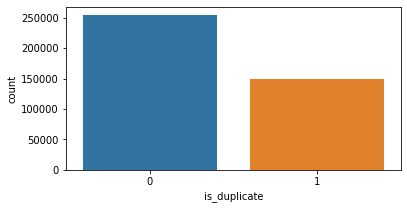

In [10]:
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6,3)
sns.countplot(train_data['is_duplicate'])

#### 3) 문자 분석

C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Probability')

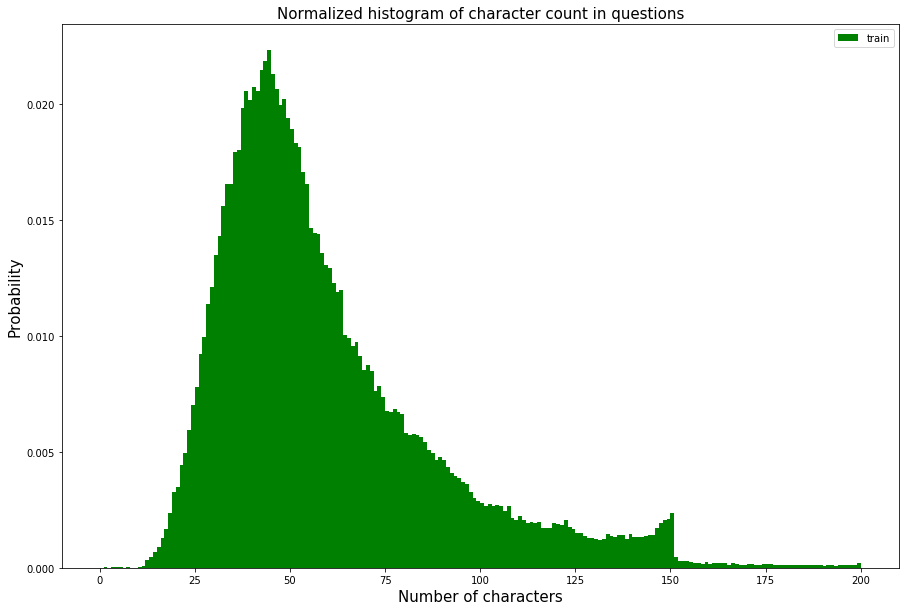

In [11]:
train_length = train_set.apply(len) #각 데이터의 길이를 담은 변수 생성(문자단위로 분석하기 위해)
plt.figure(figsize = (15, 10))
plt.hist(train_length, bins = 200, range = [0,200], facecolor = 'green', normed = True, label = 'train')
plt.title('Normalized histogram of character count in questions', fontsize = 15)
plt.legend()
plt.xlabel('Number of characters', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)

In [12]:
print('질문 길이 최댓값: {}'.format(np.max(train_length)))
print('질문 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간값: {}'.format(np.median(train_length)))
print('질문 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최댓값: 1169
질문 길이 평균값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간값: 51.0
질문 길이 제1사분위: 39.0
질문 길이 제3사분위: 72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2684ccb3cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2684ccb3e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2684ccb2dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2684ccb4808>],
 'fliers': [<matplotlib.lines.Line2D at 0x2684ccb6488>],
 'means': [<matplotlib.lines.Line2D at 0x2684ccb5d08>]}

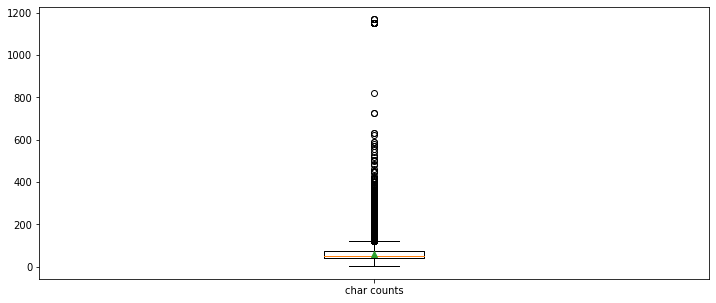

In [13]:
plt.figure(figsize = (12, 5))
plt.boxplot(train_length, labels = ['char counts'], showmeans = True)

### 4) 단어 분석

C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Probability')

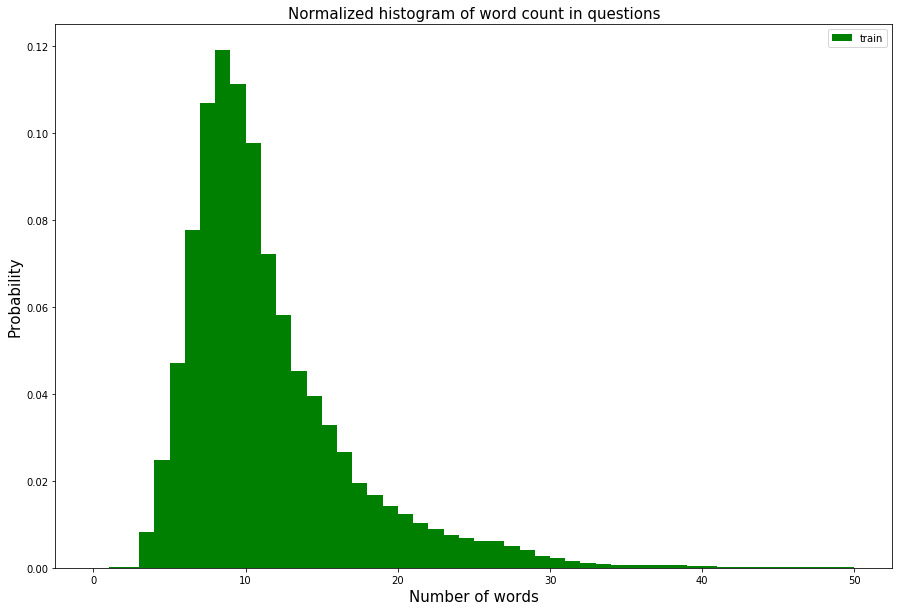

In [14]:
train_word_counts = train_set.apply(lambda x: len(x.split(' ')))

plt.figure(figsize = (15, 10))
plt.hist(train_word_counts, bins = 50, range = [0, 50], facecolor = 'green', normed =True, label = 'train')
plt.title('Normalized histogram of word count in questions', fontsize = 15)
plt.legend()
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)

In [15]:
print('질문 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최댓값: 237
질문 단어 개수 평균값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간값: 10.0
질문 단어 개수 제1사분위: 7.0
질문 단어 개수 제3사분위: 13.0
질문 단어 개수 99퍼센트: 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2684ccf5048>,
 'caps': [<matplotlib.lines.Line2D at 0x2684ccf5d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2684ccf4848>],
 'medians': [<matplotlib.lines.Line2D at 0x2684ccf6cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2684ccf9d48>],
 'means': [<matplotlib.lines.Line2D at 0x2684ccf8f88>]}

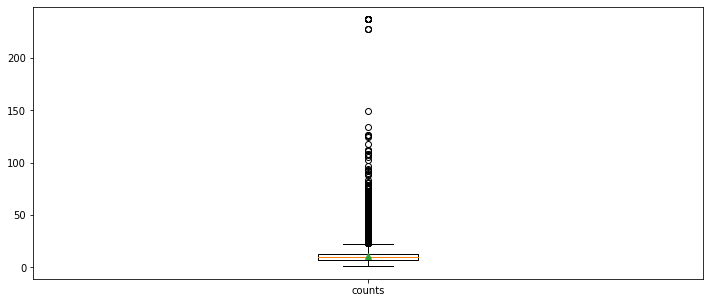

In [16]:
plt.figure(figsize = (12, 5))
plt.boxplot(train_word_counts, labels = ['counts'], showmeans = True)

In [17]:
#특수문자 비율, 수학기호 비율, 대소문자 비율 확인
qmarks = np.mean(train_set.apply(lambda x: '?' in x))
math = np.mean(train_set.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_set.apply(lambda x: '.' in x))
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper()))

In [18]:
print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가 있는 질문: {:.2f}%'.format(math * 100))
print('질문이 가득 찼을 때: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자인 질문: {:.2f}%'.format(capital_first * 100))

물음표가 있는 질문: 99.87%
수학 태그가 있는 질문: 0.12%
질문이 가득 찼을 때: 6.31%
첫 글자가 대문자인 질문: 99.81%


In [ ]:
capitals = np.mean(train_set.apply(lambda x:[y.isupper() for y in x]))
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x])))
print('대문자 있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers * 100))

### 2. 데이터 전처리

In [49]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [50]:
DATA_IN_PATH = 'C:/Users/ehrme/data_in/'
FILTERS = "([~.,!?\"':;)(])"
MAX_SEQUENCE_LENGTH = 31

train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding='utf-8')

train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

class_difference = len(train_neg_data) - len(train_pos_data)
sample_frac = 1 - (class_difference / len(train_neg_data))
train_neg_data = train_neg_data.sample(frac = sample_frac)

print("중복 질문 개수: {}".format(len(train_pos_data)))
print("중복이 아닌 질문 개수: {}".format(len(train_neg_data)))

중복 질문 개수: 149263
중복이 아닌 질문 개수: 149263


In [51]:
train_data = pd.concat([train_neg_data, train_pos_data])

change_filter = re.compile(FILTERS)

questions1 = [str(s) for s in train_data['question1']]
questions2 = [str(s) for s in train_data['question2']]

filtered_questions1 = list()
filtered_questions2 = list()

for q in questions1:
     filtered_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in questions2:
     filtered_questions2.append(re.sub(change_filter, "", q).lower())

In [52]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)

questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)

q1_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [53]:
word_vocab = {}
word_vocab = tokenizer.word_index 

labels = np.array(train_data['is_duplicate'], dtype=int)

print('Shape of question1 data: {}'.format(q1_data.shape))
print('Shape of question2 data:{}'.format(q2_data.shape))
print('Shape of label: {}'.format(labels.shape))
print("Words in index: {}".format(len(word_vocab)))

data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

Shape of question1 data: (298526, 31)
Shape of question2 data:(298526, 31)
Shape of label: (298526,)
Words in index: 76646


In [24]:
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

### 3. 평가 데이터 전처리 및 저장

In [25]:
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')
valid_ids = [type(x) ==int for x in test_data.test_id] 
test_data = test_data[valid_ids].drop_duplicates()

In [26]:
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1:
     filtered_test_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in test_questions2:
     filtered_test_questions2.append(re.sub(change_filter, "", q).lower())

In [27]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

test_id = np.array(test_data['test_id'])

print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data:{}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (2345796, 31)
Shape of question2 data:(2345796, 31)
Shape of ids: (2345796,)


In [28]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA , 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA , 'wb'), test_id)

### 4. XG 부스트 모델 구현

In [29]:
import numpy as np

DATA_IN_PATH = 'C:/Users/ehrme/data_in/'
TRAIN_Q1_DATA_FILE = 'train_q1.npy'
TRAIN_Q2_DATA_FILE = 'train_q2.npy'
TRAIN_LABEL_DATA_FILE = 'train_label.npy'

train_q1_data = np.load(open(DATA_IN_PATH + TRAIN_Q1_DATA_FILE, 'rb'))
train_q2_data = np.load(open(DATA_IN_PATH + TRAIN_Q2_DATA_FILE, 'rb'))
train_labels = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA_FILE, 'rb'))

train_input = np.stack((train_q1_data, train_q2_data), axis = 1)
print(train_input.shape)

(298526, 2, 31)


In [30]:
from sklearn.model_selection import train_test_split

train_input, eval_input, train_label, eval_label = train_test_split(train_input, train_labels, test_size = 0.2, random_state = 4242)

In [31]:
import xgboost as xgb

train_data = xgb.DMatrix(train_input.sum(axis = 1), label = train_label)
eval_data = xgb.DMatrix(eval_input.sum(axis = 1), label = eval_label)
data_list = [(train_data, 'train'), (eval_data, 'valid')]

In [32]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'rmse'

bst = xgb.train(params, train_data, num_boost_round = 1000, evals = data_list, early_stopping_rounds = 10)

[0]	train-rmse:0.483626	valid-rmse:0.484163
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.473371	valid-rmse:0.474299
[2]	train-rmse:0.46685	valid-rmse:0.468029
[3]	train-rmse:0.462105	valid-rmse:0.463617
[4]	train-rmse:0.45834	valid-rmse:0.460237
[5]	train-rmse:0.455711	valid-rmse:0.457879
[6]	train-rmse:0.453557	valid-rmse:0.455899
[7]	train-rmse:0.452072	valid-rmse:0.454711
[8]	train-rmse:0.450502	valid-rmse:0.453285
[9]	train-rmse:0.447543	valid-rmse:0.450656
[10]	train-rmse:0.446055	valid-rmse:0.449372
[11]	train-rmse:0.445169	valid-rmse:0.448705
[12]	train-rmse:0.444463	valid-rmse:0.448117
[13]	train-rmse:0.442248	valid-rmse:0.446256
[14]	train-rmse:0.441702	valid-rmse:0.445825
[15]	train-rmse:0.441261	valid-rmse:0.445476
[16]	train-rmse:0.440649	valid-rmse:0.445012
[17]	train-rmse:0.439422	valid-rmse:0.444039
[18]	train-rmse:0.438992	valid-rmse:0.443734
[19]	train-r

[179]	train-rmse:0.403281	valid-rmse:0.425549
[180]	train-rmse:0.403064	valid-rmse:0.425489
[181]	train-rmse:0.402897	valid-rmse:0.425462
[182]	train-rmse:0.402889	valid-rmse:0.425458
[183]	train-rmse:0.402881	valid-rmse:0.425455
[184]	train-rmse:0.402855	valid-rmse:0.425449
[185]	train-rmse:0.402834	valid-rmse:0.42545
[186]	train-rmse:0.402816	valid-rmse:0.425452
[187]	train-rmse:0.402798	valid-rmse:0.425444
[188]	train-rmse:0.402636	valid-rmse:0.425389
[189]	train-rmse:0.402625	valid-rmse:0.425382
[190]	train-rmse:0.402612	valid-rmse:0.425379
[191]	train-rmse:0.402437	valid-rmse:0.425314
[192]	train-rmse:0.402179	valid-rmse:0.425207
[193]	train-rmse:0.401868	valid-rmse:0.425122
[194]	train-rmse:0.401667	valid-rmse:0.425094
[195]	train-rmse:0.401424	valid-rmse:0.425032
[196]	train-rmse:0.401324	valid-rmse:0.425045
[197]	train-rmse:0.401191	valid-rmse:0.425028
[198]	train-rmse:0.401155	valid-rmse:0.424999
[199]	train-rmse:0.400948	valid-rmse:0.424934
[200]	train-rmse:0.400719	valid-rms

[358]	train-rmse:0.379124	valid-rmse:0.420209
[359]	train-rmse:0.378989	valid-rmse:0.420198
[360]	train-rmse:0.378785	valid-rmse:0.420111
[361]	train-rmse:0.37862	valid-rmse:0.420102
[362]	train-rmse:0.378543	valid-rmse:0.420094
[363]	train-rmse:0.378528	valid-rmse:0.420097
[364]	train-rmse:0.378449	valid-rmse:0.420084
[365]	train-rmse:0.378446	valid-rmse:0.420088
[366]	train-rmse:0.378304	valid-rmse:0.420069
[367]	train-rmse:0.378206	valid-rmse:0.420073
[368]	train-rmse:0.378137	valid-rmse:0.420055
[369]	train-rmse:0.378115	valid-rmse:0.420046
[370]	train-rmse:0.378109	valid-rmse:0.420042
[371]	train-rmse:0.37805	valid-rmse:0.420042
[372]	train-rmse:0.378029	valid-rmse:0.420033
[373]	train-rmse:0.377806	valid-rmse:0.420025
[374]	train-rmse:0.377721	valid-rmse:0.420006
[375]	train-rmse:0.377605	valid-rmse:0.419979
[376]	train-rmse:0.377597	valid-rmse:0.419973
[377]	train-rmse:0.377584	valid-rmse:0.419971
[378]	train-rmse:0.37754	valid-rmse:0.419952
[379]	train-rmse:0.377491	valid-rmse:

In [33]:
TEST_Q1_DATA_FILE = 'test_q1.npy'
TEST_Q2_DATA_FILE = 'test_q2.npy'
TEST_ID_DATA_FILE = 'test_id.npy'

test_q1_data = np.load(open(DATA_IN_PATH + TEST_Q1_DATA_FILE, 'rb'))
test_q2_data = np.load(open(DATA_IN_PATH + TEST_Q2_DATA_FILE, 'rb'))
test_id_data = np.load(open(DATA_IN_PATH + TEST_ID_DATA_FILE, 'rb'))

test_input = np.stack((test_q1_data, test_q2_data), axis = 1)
test_data = xgb.DMatrix(test_input.sum(axis = 1))
test_predict = bst.predict(test_data)

In [59]:
DATA_OUT_PATH = './data_out/'

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
output = pd.DataFrame({'test_id': test_id_data, 'is_duplicate': test_predict})
print(output.shape)
output.to_csv(DATA_OUT_PATH + 'simple_xgb.csv', index = False)

(2345796, 2)


### 5. CNN 텍스트 유사도 분석 모델

In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import json

In [36]:
DATA_IN_PATH = 'C:/Users/ehrme/data_in/'
DATA_OUT_PATH = './data_out/'

TRAIN_Q1_DATA_FILE = 'train_q1.npy'
TRAIN_Q2_DATA_FILE = 'train_q2.npy'
TRAIN_LABEL_DATA_FILE = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

TEST_SPLIT = 0.1
RNG_SEED = 13371447

In [138]:
EPOCH=1
BATCH_SIZE=1024

MAX_SEQUENCE_LENGTH = 31

WORD_EMBEDDING_DIM = 100
CONV_FEATURE_DIM = 300
CONV_OUTPUT_DIM = 128
CONV_WINDOW_SIZE = 3
SIMILARITY_DENSE_FEATURE_DIM = 200

prepro_configs = None

with open(DATA_IN_PATH + DATA_CONFIGS, 'r') as f:
    prepro_configs = json.load(f)

VOCAB_SIZE = prepro_configs['vocab_size']+1
print(VOCAB_SIZE)

76509


In [131]:
q1_data = np.load(open(DATA_IN_PATH + TRAIN_Q1_DATA_FILE, 'rb'))
q2_data = np.load(open(DATA_IN_PATH + TRAIN_Q2_DATA_FILE, 'rb'))
labels = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA_FILE, 'rb'))

X = np.stack((q1_data, q2_data), axis=1)
y = labels
train_X, eval_X, train_y, eval_y = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RNG_SEED)

train_Q1 = train_X[:,0]
train_Q2 = train_X[:,1]
eval_Q1 = eval_X[:,0]
eval_Q2 = eval_X[:,1]

In [132]:
def rearrange(base, hypothesis, label):
    features = {"x1": base, "x2": hypothesis}
    return features, label

def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((train_Q1, train_Q2, train_y))
    dataset = dataset.shuffle(buffer_size=10000)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.map(rearrange)
    dataset = dataset.repeat(EPOCH)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

def eval_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((eval_Q1, eval_Q2, eval_y))
    dataset = dataset.shuffle(buffer_size=10000)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.map(rearrange)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

In [133]:
def basic_conv_sementic_network(inputs, name):
    conv_layer = tf.keras.layers.Conv1D(CONV_FEATURE_DIM, 
                                        CONV_WINDOW_SIZE, 
                                        activation=tf.nn.relu, 
                                        name=name + 'conv_1d',
                                        padding='same')(inputs)
    
    max_pool_layer = tf.keras.layers.MaxPool1D(MAX_SEQUENCE_LENGTH, 
                                               1)(conv_layer)

    output_layer = tf.keras.layers.Dense(CONV_OUTPUT_DIM, 
                                         activation=tf.nn.relu,
                                         name=name + 'dense')(max_pool_layer)
    output_layer = tf.squeeze(output_layer, 1)
    
    return output_layer

In [152]:
def model_fn(features, labels, mode):
    TRAIN = mode == tf.estimator.ModeKeys.TRAIN
    EVAL = mode == tf.estimator.ModeKeys.EVAL
    PREDICT = mode == tf.estimator.ModeKeys.PREDICT
    embedding = tf.keras.layers.Embedding(VOCAB_SIZE,
                                          WORD_EMBEDDING_DIM)
    
    base_embedded_matrix = embedding(features['x1'])
    hypothesis_embedded_matrix = embedding(features['x2'])
    
    base_embedded_matrix = tf.keras.layers.Dropout(0.2)(base_embedded_matrix)
    hypothesis_embedded_matrix = tf.keras.layers.Dropout(0.2)(hypothesis_embedded_matrix)  
    
    base_sementic_matrix = basic_conv_sementic_network(base_embedded_matrix, 'base')
    hypothesis_sementic_matrix = basic_conv_sementic_network(hypothesis_embedded_matrix, 'hypothesis')  
    merged_matrix = tf.concat([base_sementic_matrix, hypothesis_sementic_matrix], -1)
    similarity_dense_layer = tf.keras.layers.Dense(SIMILARITY_DENSE_FEATURE_DIM,
                                             activation=tf.nn.relu)(merged_matrix)
    
    similarity_dense_layer = tf.keras.layers.Dropout(0.2)(similarity_dense_layer)    
    logit_layer = tf.keras.layers.Dense(1)(similarity_dense_layer)
    logit_layer = tf.squeeze(logit_layer, 1)
    similarity = tf.nn.sigmoid(logit_layer)
    
    if PREDICT:
        return tf.estimator.EstimatorSpec(
                  mode=mode,
                  predictions={
                      'is_duplicate':similarity
                  })
    
    loss = tf.losses.sigmoid_cross_entropy(labels, logit_layer)

    if EVAL:
        accuracy = tf.metrics.accuracy(labels, tf.round(similarity))
        return tf.estimator.EstimatorSpec(
                  mode=mode,
                  eval_metric_ops= {'acc': accuracy},
                  loss=loss)
    if TRAIN:
        global_step = tf.train.get_global_step()
        train_op = tf.train.AdamOptimizer(1e-3).minimize(loss, global_step)

        return tf.estimator.EstimatorSpec(
                  mode=mode,
                  train_op=train_op,
                  loss=loss)
    

In [153]:
os.environ["CUDA_VISIBLE_DEVICES"]="6" 

model_dir = os.path.join(os.getcwd(), DATA_OUT_PATH + "checkpoint/cnn/")
os.makedirs(model_dir, exist_ok=True)

In [154]:
est = tf.estimator.Estimator(model_fn, model_dir=model_dir)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ehrme\\텐서플로와 머신러닝으로 시작하는 자연어처리\\./data_out/checkpoint/cnn/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002696ED875C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
est.train(train_input_fn)